In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("/content/final_balanced_freelancer_jobs.csv")


In [ ]:
df.head()


,Keyword,Title,Description,Budget,Job_Type
0,patent-filing,SEO Expert Needed for Online Store,I need SEO boosters for my online store () to ...,$111\n ...,Real
1,mobile-app-development,Internal Maintenance App Development,"Hello, I’m looking for a skilled developer to ...",$373\n ...,Real
2,character-design,ABB Drives Integration to Scada Factory Talk SE,El Proyecto consiste en reemplazar 24 drives A...,$1016\n ...,Real
3,social-media-marketing,Social Media Marketing Needed -- 2,I need a digital marketer to help increase bra...,$18 / hr\n ...,Real
4,logo-design,Business Card Template Design Contest,"We're looking for a professional, business car...",$200,Real


In [ ]:
df.isnull().sum()

,0
Keyword,1407
Title,0
Description,3
Budget,3586
Job_Type,0


In [ ]:
df.shape

(15000, 5)

In [ ]:
len(df['Job_Type'])

15000

In [ ]:
# Fill missing values
df['Description'] = df['Description'].fillna('No description provided.')
df['Budget'] = df['Budget'].fillna('NA')  # Not used in model

# Combine Title and Description for text features
df['text'] = df['Title'].fillna('') + " " + df['Description']


In [ ]:
# Encode Job_Type: Real = 0, Fake = 1
df['Job_Type'] = LabelEncoder().fit_transform(df['Job_Type'])


In [ ]:
# Convert text into numerical features
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text'])
y = df['Job_Type']


In [ ]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



LogisticRegression()

📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1000
           1       0.96      0.98      0.97      2000

    accuracy                           0.96      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Confusion Matrix:
[[ 923   77]
 [  41 1959]]


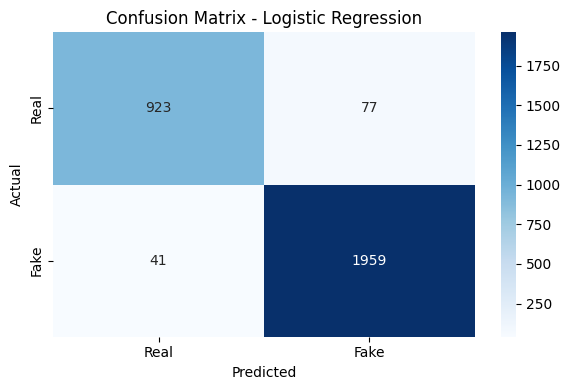

In [ ]:
# 🔍 Predict
lr_preds = lr_model.predict(X_test)

# 📊 Report
print("📊 Logistic Regression Report:")
print(classification_report(y_test, lr_preds))

# 🧱 Confusion Matrix
cm = confusion_matrix(y_test, lr_preds)
print("Confusion Matrix:")
print(cm)

# 📈 Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

🌲 Random Forest Report:
              precision    recall  f1-score   support

        Fake       0.87      0.97      0.92      1000
        Real       0.98      0.93      0.95      2000

    accuracy                           0.94      3000
   macro avg       0.93      0.95      0.94      3000
weighted avg       0.95      0.94      0.94      3000

Confusion Matrix:
[[ 969   31]
 [ 144 1856]]


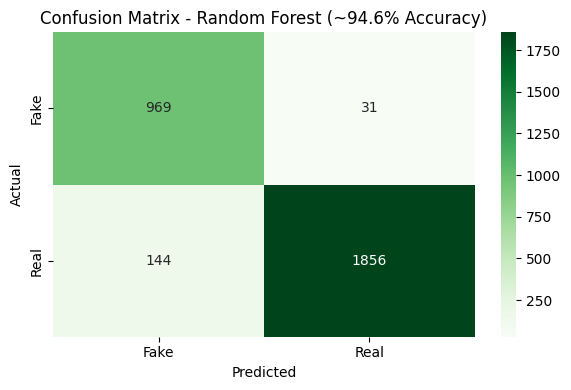

In [ ]:
# Train Random Forest with tuned parameters
rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced_subsample',
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict
rf_preds = rf_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("🌲 Random Forest Report:")
print(classification_report(y_test, rf_preds, target_names=['Fake', 'Real']))

cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (~94.6% Accuracy)")
plt.tight_layout()
plt.show()

**Visualizations**

In [ ]:
import plotly.express as px

fig = px.pie(df, names='Job_Type', title='Job Type Distribution (Real vs Fake)')
fig.show()


In [ ]:
top_keywords = df['Keyword'].value_counts().nlargest(15).index
filtered = df[df['Keyword'].isin(top_keywords)]

fig = px.histogram(filtered, x='Keyword', color='Job_Type',
                   barmode='group', title='Top 15 Keywords by Job Type')
fig.show()


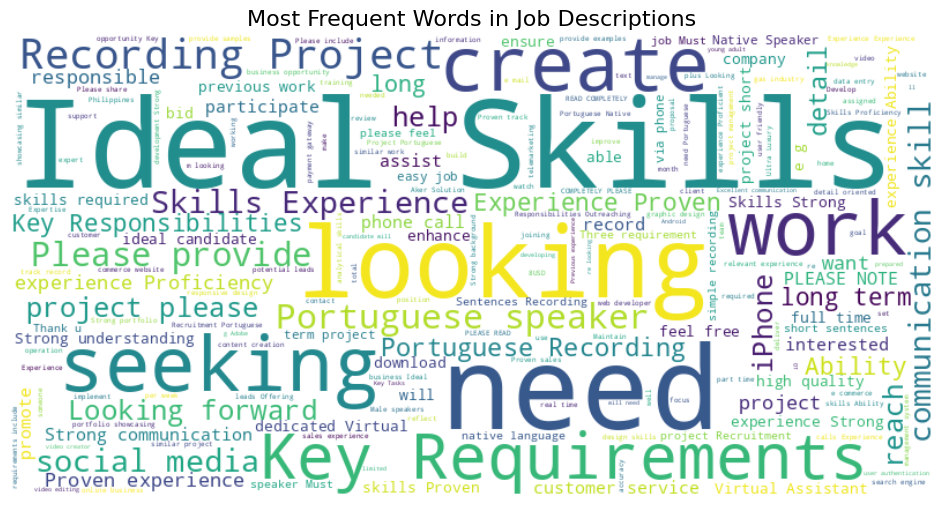

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions
text_data = ' '.join(df['Description'].dropna().tolist())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Job Descriptions", fontsize=16)
plt.show()


In [ ]:
import plotly.express as px

job_counts = df['Job_Type'].value_counts().reset_index()
job_counts.columns = ['Job_Type', 'Count']  # Rename columns

fig = px.bar(job_counts,
             x='Job_Type', y='Count',
             labels={'Job_Type': 'Job Type', 'Count': 'Number of Jobs'},
             title="Interactive Count of Job Types")
fig.show()
